# COVID 19 Detection using Deep Learning

#### Importing Library

In [15]:
import pandas as pd
import numpy as np
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as img

#### Reading image from dataset

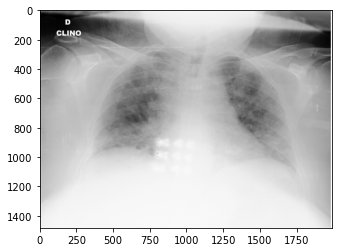

In [8]:
covidImage = img.imread('Dataset/Train/Covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg')
plt.imshow(covidImage);

- Above image is showing that patient has covid 19

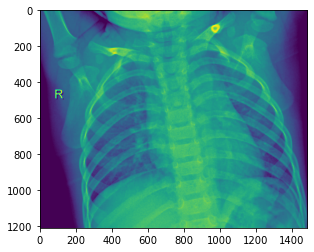

In [9]:
normalImage = img.imread('Dataset/Train/Normal/IM-0156-0001.jpeg')
plt.imshow(normalImage);

- We can cleary see the clean lungs of normal people

#### Defining Paths

In [10]:
TRAIN_PATH = 'Dataset/Train/'
VAL_PATH = 'Dataset/Val/'

#### Defining Model Architecture

In [12]:
# Sequential Model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

# we want output in True[1] or False[0], 
# so this become classification proble therefore we will use sigmoid function at the output layer
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

#### Compiling The Model

In [13]:
model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 128)     36992     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 128)     0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 128)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

- we have "5,723,457" parameters in our model

#### Training Data

In [17]:
trainDataGen = image.ImageDataGenerator(rescale= 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
testDataGen = image.ImageDataGenerator(rescale= 1./255)

#### Reshaping test and validation images

In [25]:
trainGen = trainDataGen.flow_from_directory(
    TRAIN_PATH,
    target_size=(224, 224),
    batch_size =20,
    class_mode = 'binary'
)

valGen = testDataGen.flow_from_directory(
    VAL_PATH,
    target_size=(224, 224),
    batch_size = 20,
    class_mode = 'binary'
)

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


#### Training The Model

In [26]:
history = model.fit_generator(trainGen, steps_per_epoch=8, epochs=10, validation_data=valGen, validation_steps=2)

Epoch 1/10
8/8 [==============================] - 59s 7s/step - loss: 0.3875 - accuracy: 0.8333 - val_loss: 0.2841 - val_accuracy: 0.9250
Epoch 2/10
8/8 [==============================] - 57s 7s/step - loss: 0.4035 - accuracy: 0.8611 - val_loss: 0.4394 - val_accuracy: 0.9250
Epoch 3/10
8/8 [==============================] - 57s 7s/step - loss: 0.3176 - accuracy: 0.8681 - val_loss: 0.2035 - val_accuracy: 1.0000
Epoch 4/10
8/8 [==============================] - 58s 7s/step - loss: 0.3403 - accuracy: 0.8403 - val_loss: 0.1745 - val_accuracy: 0.9500
Epoch 5/10
8/8 [==============================] - 58s 7s/step - loss: 0.2780 - accuracy: 0.8681 - val_loss: 0.5697 - val_accuracy: 0.9750
Epoch 6/10
8/8 [==============================] - 58s 7s/step - loss: 0.3398 - accuracy: 0.8889 - val_loss: 0.2225 - val_accuracy: 0.9500
Epoch 7/10
8/8 [==============================] - 58s 7s/step - loss: 0.2269 - accuracy: 0.9028 - val_loss: 0.1312 - val_accuracy: 0.9750
Epoch 8/10
8/8 [==================

#### Summary

In [27]:
summary = history.history
summary

{'loss': [0.3874974250793457,
  0.4035249948501587,
  0.3175886869430542,
  0.34025198221206665,
  0.2780340611934662,
  0.3397892713546753,
  0.22689376771450043,
  0.1712978035211563,
  0.30134761333465576,
  0.1553933024406433],
 'accuracy': [0.8333333134651184,
  0.8611111044883728,
  0.8680555820465088,
  0.8402777910232544,
  0.8680555820465088,
  0.8888888955116272,
  0.9027777910232544,
  0.9444444179534912,
  0.9097222089767456,
  0.9513888955116272],
 'val_loss': [0.2841431498527527,
  0.43944311141967773,
  0.20353981852531433,
  0.17449218034744263,
  0.5697296857833862,
  0.22245430946350098,
  0.1311642825603485,
  0.07383648306131363,
  0.14927789568901062,
  0.04910583049058914],
 'val_accuracy': [0.925000011920929,
  0.925000011920929,
  1.0,
  0.949999988079071,
  0.9750000238418579,
  0.949999988079071,
  0.9750000238418579,
  0.9750000238418579,
  0.9750000238418579,
  0.9750000238418579]}

#### Saving The Model

In [28]:
model.save('model.h5')

In [29]:
model.evaluate_generator(trainGen)

D:\Programming\Python\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.09375006705522537, 0.96875]

In [30]:
model.evaluate_generator(valGen)

D:\Programming\Python\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.08552446216344833, 0.9666666388511658]

#### Confusion Matrix

In [31]:
import os
trainGen.class_indices

{'Covid': 0, 'Normal': 1}

In [32]:
y_actual, y_test = [], []

In [35]:
for i in os.listdir("./Dataset/Val/Normal/"):
    
    # Loading the images
    imgVar=image.load_img("./Dataset/Val/Normal/"+i,target_size=(224,224))
    
    # converting images to array
    imgVar=image.img_to_array(imgVar)
    imgVar=np.expand_dims(imgVar,axis=0)
    
    # predicting for images array
    pred=model.predict_classes(imgVar)
    
    # saving the prediction result in list
    y_test.append(pred[0,0])
    y_actual.append(1)
    

In [36]:
for i in os.listdir("./Dataset/Val/Covid/"):
    
    # Loading the images
    imgVar=image.load_img("./Dataset/Val/Covid/"+i,target_size=(224,224))
    
    # converting images to array
    imgVar=image.img_to_array(imgVar)
    imgVar=np.expand_dims(imgVar,axis=0)
    
    # predicting for images array
    pred=model.predict_classes(imgVar)
    
    # saving the prediction result in list
    y_test.append(pred[0,0])
    y_actual.append(0)

In [37]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [39]:
cn = confusion_matrix(y_actual, y_test)

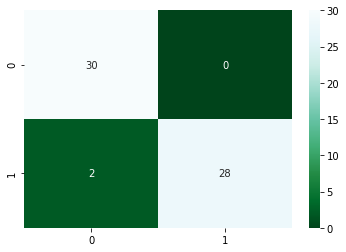

In [54]:
sns.heatmap(cn, cmap='BuGn_r', annot=True);